**Importing required libraries**

In [1]:

import pandas as pd # For data loading and manipulation
from sklearn.model_selection import train_test_split # To split data into training and testing sets
from sklearn.preprocessing import StandardScaler # To normalize data (vital for Gradient Descent)
from sklearn.metrics import accuracy_score # To measure model performance

**Models**

In [2]:

from sklearn.linear_model import LogisticRegression # Model 1: Traditional statistical classification
from sklearn.ensemble import RandomForestClassifier # Model 2: Tree-based ensemble learning
from sklearn.linear_model import SGDClassifier # Model 3: Gradient Descent based optimization

**Loading data**

In [3]:

df = pd.read_csv('diabetes.csv')

In [4]:
# Separate Features (X) from the Target (y)
# X = patient health metrics; y = whether they have diabetes (0 or 1)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

**Splitting the data 80% used for training the models, 20% for testing their accuracy**

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature scaling**

In [6]:

# Scaling is essential for Gradient Descent to converge efficiently 
# It ensures variables like 'Glucose' and 'Age' are treated on the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

**Initializing the models for comparison**

In [7]:

# We store our 3 chosen models in a dictionary for easy comparison
models = {
    "Logistic Regression": LogisticRegression(),
    
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    
    "Gradient Descent (SGD)": SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)
}

**Training and evaluating the data**

In [8]:

print("--- Healthcare Model Performance Comparison ---")

for name, model in models.items():
    # Train the model using the scaled training features and target labels
    model.fit(X_train_scaled, y_train)
    
    # Using the trained model to predict the outcome for the test data
    predictions = model.predict(X_test_scaled)
    
    # to Calculate the accuracy score (Percentage of correct predictions)
    accuracy = accuracy_score(y_test, predictions)
    
    # Output the result
    print(f"{name} Accuracy: {accuracy:.2%}")

--- Healthcare Model Performance Comparison ---
Logistic Regression Accuracy: 75.32%
Random Forest Accuracy: 72.08%
Gradient Descent (SGD) Accuracy: 67.53%


**Confusion matrices for each model**


--- Confusion Matrices ---

Logistic Regression Confusion Matrix:
[[79 20]
 [18 37]]

Random Forest Confusion Matrix:
[[77 22]
 [21 34]]

Gradient Descent (SGD) Confusion Matrix:
[[73 26]
 [24 31]]


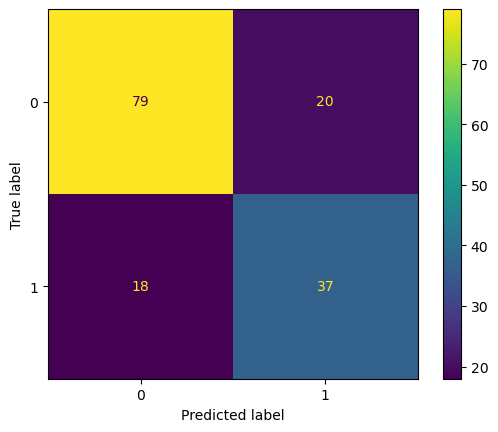

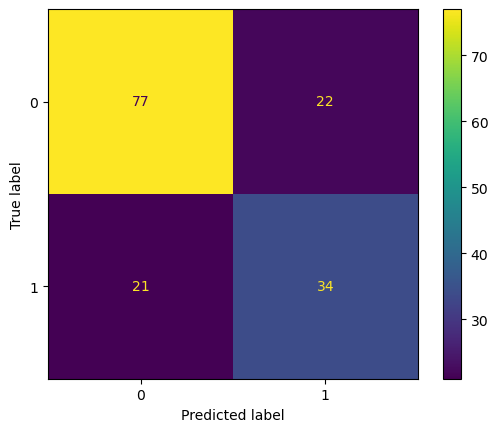

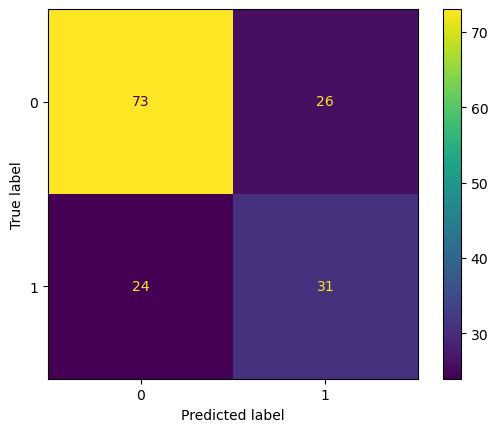

In [9]:
# 7. Confusion matrices for each model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("\n--- Confusion Matrices ---")

for name, model in models.items():
    # Refit on the full training data (scaled)
    model.fit(X_train_scaled, y_train)
    
    # Predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"\n{name} Confusion Matrix:")
    print(cm)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

**Classification report for each model**

In [10]:

from sklearn.metrics import classification_report

print("\n--- Classification Reports ---")

for name, model in models.items():
    # Fitting the model on the training data (scaled)
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test_scaled)
    
    # for Printing the classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, digits=3))


--- Classification Reports ---

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0      0.814     0.798     0.806        99
           1      0.649     0.673     0.661        55

    accuracy                          0.753       154
   macro avg      0.732     0.735     0.733       154
weighted avg      0.755     0.753     0.754       154


Random Forest Classification Report:
              precision    recall  f1-score   support

           0      0.786     0.778     0.782        99
           1      0.607     0.618     0.613        55

    accuracy                          0.721       154
   macro avg      0.696     0.698     0.697       154
weighted avg      0.722     0.721     0.721       154


Gradient Descent (SGD) Classification Report:
              precision    recall  f1-score   support

           0      0.753     0.737     0.745        99
           1      0.544     0.564     0.554        55

    accuracy         